## Importing necessary libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## Importing datasets

In [26]:
# Read Train and Test datasets combined in the EDA, that already contain missing value imputations
raw_combined = pd.read_csv("../Data/raw_combined.csv", index_col = 0)

In [27]:
# Explore dataset
raw_combined[:5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Train
0,22.0,NO,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NO,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NO,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


## Selecting predictors and target variable

In [28]:
# Select possible predictors and target variable
predictors = ["Age", "Cabin", "Embarked", "Fare", "Parch", "Pclass", "Sex", "SibSp"]
target = ["Survived"]

## Encoding categorical variables

In [29]:
# Generate dataframe only with predictors
label_df = raw_combined[predictors]

In [30]:
# Initialize label encoder
label_encoder = LabelEncoder()

In [31]:
# Encode only categorical variables
for i, col in enumerate(label_df):
    # If a given column is categorical
    if label_df[col].dtype == 'object':
        # Encode that column with fit_transform
        label_df[col] = label_encoder.fit_transform(label_df[col])

/Users/luciaronchi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# Explore resulting df
label_df

,Age,Cabin,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,185,3,7.2500,0,3,1,1
1,38.0,106,0,71.2833,0,1,0,1
2,26.0,185,3,7.9250,0,3,0,0
3,35.0,70,3,53.1000,0,1,0,1
4,35.0,185,3,8.0500,0,3,1,0
...,...,...,...,...,...,...,...,...
413,28.0,185,3,8.0500,0,3,1,0
414,39.0,64,0,108.9000,0,1,0,0
415,38.5,185,3,7.2500,0,3,1,0
416,28.0,185,3,8.0500,0,3,1,0


## Splitting into Train and Test

In [33]:
# Create new train and test sample, within Train sample
x_train, x_test, y_train, y_test = model_selection.train_test_split(label_df.loc[raw_combined["Train"] == 1,], 
                                                                    raw_combined.loc[raw_combined["Train"] == 1, "Survived"], 
                                                                    test_size = 0.2, 
                                                                    random_state = 232323)

## Modelling

In [34]:
# Initialize random forest object
rnd_clf = RandomForestClassifier(random_state = 232323, n_jobs=-1)

In [35]:
# Initialize parameter grid
param_grid = [
    {'n_estimators': [10, 50, 100, 500, 1000], 
     'max_features': ["sqrt", "log2", label_df.shape[1]],
     'max_depth': [None, 5, 10, 20, 50, 100, 500], 
     'min_samples_split': [2, 10, 25, 50, 75, 100, 200]}
]

In [36]:
# Initialize the grid search model
grid_search = model_selection.GridSearchCV(estimator = rnd_clf, param_grid = param_grid, 
                                           cv = 10, n_jobs = -1, verbose = 2)

In [37]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train.values.ravel())

Fitting 10 folds for each of 735 candidates, totalling 7350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 7350 out of 7350 | elapsed: 13.6min finished
/Users/luciaronchi/opt/anaconda3/lib

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=232323, verbose=0,
                                              warm_start=False),
             ii

In [38]:
# Store final model
final_model = grid_search.best_estimator_

## Evaluating the model

### Train Set

In [39]:
# Predict values on Train
y_hat_train = final_model.predict(x_train)

In [40]:
# Print confusion matrix
cm = metrics.confusion_matrix(y_train, y_hat_train)
cm

array([[418,  14],
       [ 44, 236]])

In [41]:
# Print classification Report for Train Set
print(metrics.classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       432
         1.0       0.94      0.84      0.89       280

    accuracy                           0.92       712
   macro avg       0.92      0.91      0.91       712
weighted avg       0.92      0.92      0.92       712



In [42]:
# Accuracy
metrics.accuracy_score(y_train, y_hat_train)

0.9185393258426966

In [43]:
# Sensitivity / Recall (TPR)
cm[1,1]/(cm[1,1] + cm[1,0])

0.8428571428571429

In [44]:
# Specificity / Selectivity (TNR)
cm[0,0]/(cm[0,0] + cm[0,1])

0.9675925925925926

### Test Set

In [45]:
# Predict values on Test
y_hat_test = final_model.predict(x_test)

In [46]:
# Print confusion matrix
cm = metrics.confusion_matrix(y_test, y_hat_test)
cm

array([[108,   9],
       [ 19,  43]])

In [47]:
# Print classification Report for Train Set
print(metrics.classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.89       117
         1.0       0.83      0.69      0.75        62

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



In [48]:
# Accuracy
metrics.accuracy_score(y_test, y_hat_test)

0.8435754189944135

In [49]:
# Sensitivity / Recall (TPR)
cm[1,1]/(cm[1,1] + cm[1,0])

0.6935483870967742

In [50]:
# Specificity / Selectivity (TNR)
cm[0,0]/(cm[0,0] + cm[0,1])

0.9230769230769231

## Understanding Feature Importance

In [51]:
# Extract feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.17894602, 0.07765547, 0.02120892, 0.16848939, 0.01599698,
       0.1141757 , 0.38718712, 0.0363404 ])

In [52]:
# Create dataframe with feature importances
feature_importances = pd.DataFrame(pd.concat([pd.DataFrame(x_train.columns), pd.DataFrame(feature_importances)], axis = 1))
feature_importances.columns = ["Feature", "Importance"]

In [53]:
# Sort in Descending order of importance
feature_importances.sort_values("Importance", ascending = False, inplace = True)
feature_importances

,Feature,Importance
6,Sex,0.387187
0,Age,0.178946
3,Fare,0.168489
5,Pclass,0.114176
1,Cabin,0.077655
7,SibSp,0.036340
2,Embarked,0.021209
4,Parch,0.015997


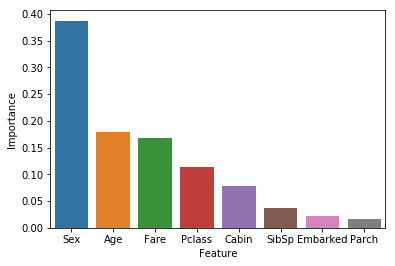

In [54]:
# Visualize feature importances
sns.barplot(x = "Feature", y = "Importance", data = feature_importances)
plt.show()

## Predicting on Test Data

In [55]:
# Predict on Test data (Train = FALSE)
y_hat = final_model.predict(label_df.loc[raw_combined["Train"] == 0])

In [56]:
# Generate Results dataframe
y_hat = pd.DataFrame(y_hat.astype(int), columns = ["Survived"])
result = pd.concat([raw_combined.loc[raw_combined["Train"] == 0, "PassengerId"], y_hat], axis = 1)
result.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


## Submitting results

In [57]:
result.to_csv("/Users/luciaronchi/Documents/Data_Challenges/Titanic/Submissions/random_forest_2.csv", index = False)